In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import time
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Flatten, LSTM
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy import stats
import scipy
from scipy.stats import chi2
import autokeras as ak

# Score Predict

In [9]:
#GLOBES: ./sample_ML_classification
data2 = np.load('/home/ML4NO/Data/sample_ML_classification0911.npz')

### Build Input Generator

In [12]:
def input_generator_DUT2():
    while True:
        x1_batch = []
        x2_batch = []
        x3_batch = []
        x4_batch = []

        x5_batch = []
        x6_batch = []
        x7_batch = []
        x8_batch = []

        for i in range(0, N_input):
            x1_batch.append(data2['ve_dune'][i]/np.max(data2['ve_dune'][i]))
            x2_batch.append(data2['vebar_dune'][i]/np.max(data2['vebar_dune'][i]))
            x3_batch.append(data2['ve_t2hk'][i]/np.max(data2['ve_t2hk'][i]))
            x4_batch.append(data2['vebar_t2hk'][i]/np.max(data2['vebar_t2hk'][i]))

            x5_batch.append(data2['vu_dune'][i]/np.max(data2['vu_dune'][i]))
            x6_batch.append(data2['vubar_dune'][i]/np.max(data2['vubar_dune'][i]))
            x7_batch.append(data2['vu_t2hk'][i]/np.max(data2['vu_t2hk'][i]))
            x8_batch.append(data2['vubar_t2hk'][i]/np.max(data2['vubar_t2hk'][i])) 

        yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch),'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
               ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch),'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)}
               )
input_generator_DUT2 = input_generator_DUT2()

def input_generator_DU():
    while True:
        x1_batch = []
        x2_batch = []

        x5_batch = []
        x6_batch = []

        for i in range(0, N_input):
            x1_batch.append(data2['ve_dune'][i]/np.max(data2['ve_dune'][i]))
            x2_batch.append(data2['vebar_dune'][i]/np.max(data2['vebar_dune'][i]))

            x5_batch.append(data2['vu_dune'][i]/np.max(data2['vu_dune'][i]))
            x6_batch.append(data2['vubar_dune'][i]/np.max(data2['vubar_dune'][i]))

        yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch)
               ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch)})
input_generator_DU = input_generator_DU()

def input_generator_T2():
    while True:
        x3_batch = []
        x4_batch = []

        x7_batch = []
        x8_batch = []

        for i in range(0, N_input):
            x3_batch.append(data2['ve_t2hk'][i]/np.max(data2['ve_t2hk'][i]))
            x4_batch.append(data2['vebar_t2hk'][i]/np.max(data2['vebar_t2hk'][i]))

            x7_batch.append(data2['vu_t2hk'][i]/np.max(data2['vu_t2hk'][i]))
            x8_batch.append(data2['vubar_t2hk'][i]/np.max(data2['vubar_t2hk'][i]))

        yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
               ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)})
input_generator_T2 = input_generator_T2()

### Prediction

In [27]:
model_DU = tf.keras.models.load_model('/home/ML4NO/Data/model_DU.h5')
model_T2 = tf.keras.models.load_model('/home/ML4NO/Data/model_T2.h5')
model_DUT2 = tf.keras.models.load_model('/home/ML4NO/Data/model_DUT2.h5')

In [28]:
prediction_DUT2 = model_DUT2.predict(input_generator_DUT2, verbose=1,steps = 1)

1/1 [==============================] - 0s 137ms/step


In [16]:
prediction_DU = model_DU.predict(input_generator_DU, verbose=1,steps = 1)

1/1 [==============================] - 0s 102ms/step


In [17]:
prediction_T2 = model_T2.predict(input_generator_T2, verbose=1,steps = 1)

1/1 [==============================] - 0s 97ms/step


# Calculate Chi Square

In [18]:
P_cpc_DUT2 = np.transpose(prediction_DUT2)[0]
P_cpv_DUT2 = np.transpose(prediction_DUT2)[1]
P_cpc_DU = np.transpose(prediction_DU)[0]
P_cpv_DU = np.transpose(prediction_DU)[1]
P_cpc_T2 = np.transpose(prediction_T2)[0]
P_cpv_T2 = np.transpose(prediction_T2)[1]

In [19]:
delta_chi2_DUT2 = -2*np.log(P_cpc_DUT2/P_cpv_DUT2)
delta_chi2_DU = -2*np.log(P_cpc_DU/P_cpv_DU)
delta_chi2_T2 = -2*np.log(P_cpc_T2/P_cpv_T2)

# Plot ML Results

Text(0.5, 1.0, 'CPV Sensitivity by ML')

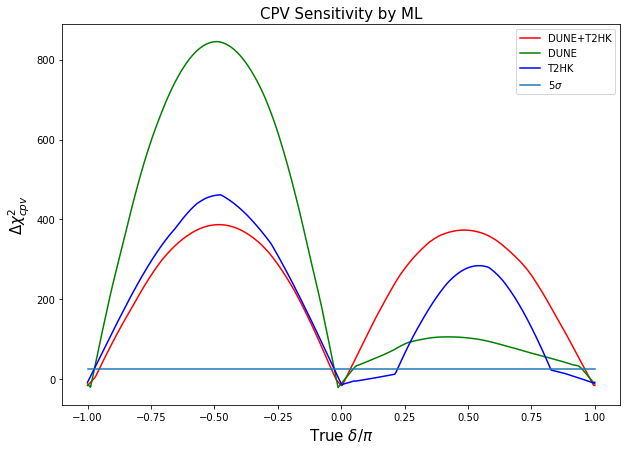

In [20]:
plt.figure(figsize = (10,7))
# plt.ylim(0, 200)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2_{cpv} $', fontsize=15)
x = data2['delta']/180
plt.plot(x, delta_chi2_DUT2,'r', label='DUNE+T2HK')
plt.plot(x, delta_chi2_DU,'g', label='DUNE')
plt.plot(x, delta_chi2_T2,'b', label='T2HK')
plt.plot(np.linspace(-1,1,100),np.full(100,25), label=r'$5 \sigma $')
plt.legend()
plt.title('CPV Sensitivity by ML', fontsize=15)

# Comparing to Tradition Method

## Load Data

In [35]:
#Import txt檔
f = open("/home/ML4NO/Data/sample_chi_4-1_run1.txt")
#總資料組數
N = 121

In [37]:
delta_cp = []
OFF_DU = []
OFF_T2 = []
OFF_DUT2 = []
ON_DU = []
ON_T2 = []
ON_DUT2 = []

In [60]:
#Import txt檔
f = open("sample_chi_4-1_run1.txt")
#總資料組數
N = 121

In [ ]:
for i in range(N):
    s = f.readline().split()
    array = []
    for j in range(len(s)) :
        array.append(float(s[j])) 
    delta_cp.append(array[0])
    OFF_DU.append(array[1]) 
    OFF_T2.append(array[2])
    OFF_DUT2.append(array[3])
    ON_DU.append(array[4]) 
    ON_T2.append(array[5]) 
    ON_DUT2.append(array[6]) 

In [62]:
delta_cp = np.array(delta_cp)
OFF_DU = np.array(OFF_DU)
OFF_T2 = np.array(OFF_T2)
OFF_DUT2 = np.array(OFF_DUT2)
ON_DU = np.array(ON_DU)
ON_T2 = np.array(ON_T2)
ON_DUT2 = np.array(ON_DUT2)

Text(0.5, 1.0, 'CPV Sensitivity by GLOBES')

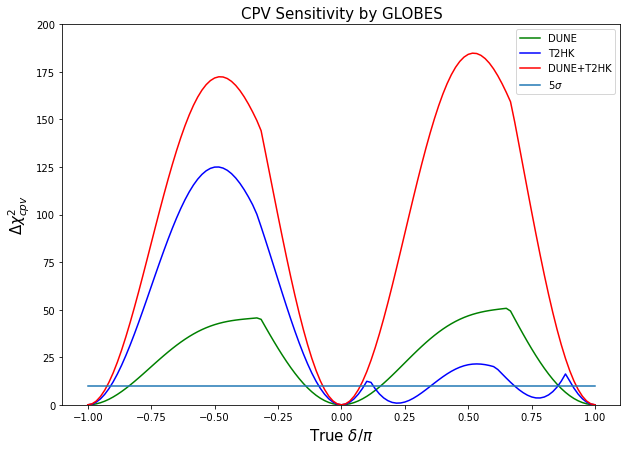

In [63]:
plt.figure(figsize = (10,7))
plt.ylim(0, 200)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2_{cpv} $', fontsize=15)
y0 = OFF_DU
y2 = OFF_T2
y4 = OFF_DUT2
x = delta_cp/180
plt.plot(x, y0,'g', label='DUNE')
plt.plot(x, y2,'b', label='T2HK')
plt.plot(x, y4,'r', label='DUNE+T2HK')
plt.plot(np.linspace(-1,1,100),np.full(100,10), label=r'$5 \sigma $')
plt.legend()
# plt.title('sys_OFF  [1,0,0,1,1,0] without prior', fontsize=15)
plt.title('CPV Sensitivity by GLOBES', fontsize=15)

## Plot Asimov : GLOBES vs ML

### DUNE+T2HK

Text(0.5, 1.0, 'DUNE+T2HK')

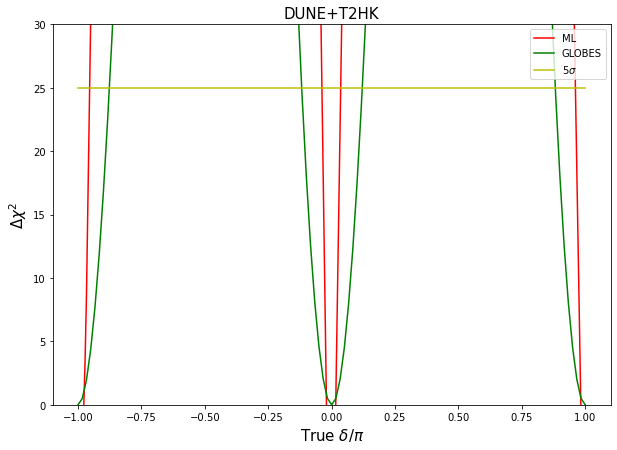

In [130]:
plt.figure(figsize = (10,7))
plt.ylim(0,30)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['delta']/180
plt.plot(x, delta_chi2_DUT2,'r', label='ML')
plt.plot(delta_cp/180, OFF_DUT2,'g', label='GLOBES')
plt.plot(np.linspace(-1,1,100),np.full(100,25),'y', label=r'$5\sigma $')
plt.legend()
plt.title('DUNE+T2HK', fontsize=15)

### DUNE

Text(0.5, 1.0, 'DUNE')

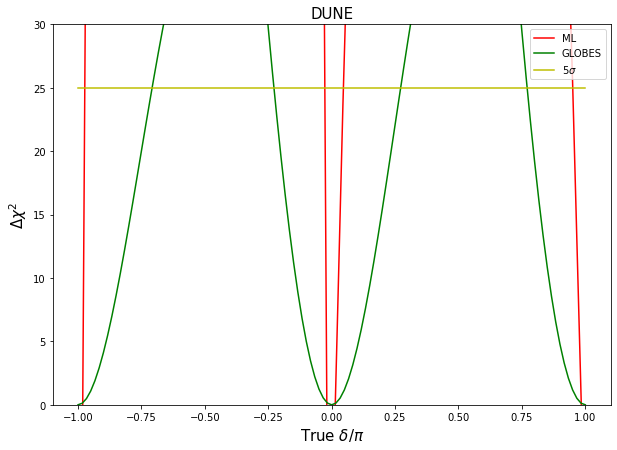

In [131]:
plt.figure(figsize = (10,7))
plt.ylim(0,30)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['delta']/180
plt.plot(x, delta_chi2_DU,'r', label='ML')
plt.plot(delta_cp/180, OFF_DU,'g', label='GLOBES')
plt.plot(np.linspace(-1,1,100),np.full(100,25),'y', label=r'$5\sigma $')
plt.legend()
plt.title('DUNE', fontsize=15)

### T2HK

Text(0.5, 1.0, 'T2HK')

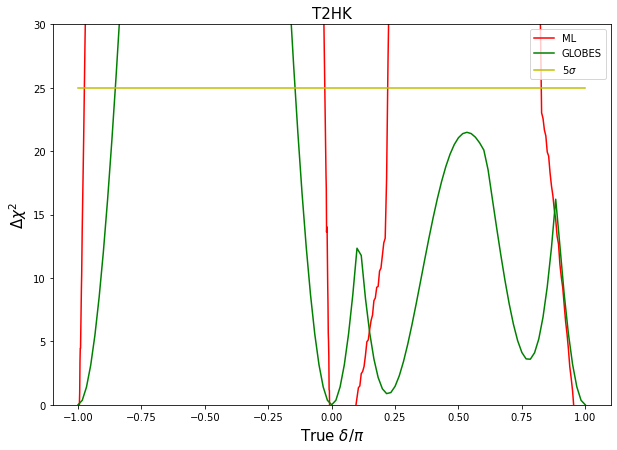

In [132]:
plt.figure(figsize = (10,7))
plt.ylim(0,30)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
x = data2['delta']/180
plt.plot(x, delta_chi2_T2,'r', label='ML')
plt.plot(delta_cp/180, OFF_T2,'g', label='GLOBES')
plt.plot(np.linspace(-1,1,100),np.full(100,25),'y', label=r'$5\sigma $')
plt.legend()
plt.title('T2HK', fontsize=15)

# Testing Asimov vs Median of ML

## Build Input Poisson Generator at Certain Angle

In [161]:
def input_poisson_generator_DUT2():
    while True:
        x1_batch = []
        x2_batch = []
        x3_batch = []
        x4_batch = []

        x5_batch = []
        x6_batch = []
        x7_batch = []
        x8_batch = []

        for i in range(0, N_sample):
            ve_dune_poisson    = np.random.poisson(data2['ve_dune'][deltacp_label])
            vebar_dune_poisson = np.random.poisson(data2['vebar_dune'][deltacp_label])
            ve_t2hk_poisson    = np.random.poisson(data2['ve_t2hk'][deltacp_label])
            vebar_t2hk_poisson = np.random.poisson(data2['vebar_t2hk'][deltacp_label])

            vu_dune_poisson = np.random.poisson(data2['vu_dune'][deltacp_label])
            vubar_dune_poisson = np.random.poisson(data2['vubar_dune'][deltacp_label])
            vu_t2hk_poisson = np.random.poisson(data2['vu_t2hk'][deltacp_label])
            vubar_t2hk_poisson = np.random.poisson(data2['vubar_t2hk'][deltacp_label])

            x1_batch.append(ve_dune_poisson/np.max(ve_dune_poisson))
            x2_batch.append(vebar_dune_poisson/np.max(vebar_dune_poisson))
            x3_batch.append(ve_t2hk_poisson/np.max(ve_t2hk_poisson))
            x4_batch.append(vebar_t2hk_poisson/np.max(vebar_t2hk_poisson))

            x5_batch.append(vu_dune_poisson/np.max(vu_dune_poisson))
            x6_batch.append(vubar_dune_poisson/np.max(vubar_dune_poisson))
            x7_batch.append(vu_t2hk_poisson/np.max(vu_t2hk_poisson))
            x8_batch.append(vubar_t2hk_poisson/np.max(vubar_t2hk_poisson))

        yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch),'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
               ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch),'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)})
input_poisson_generator_DUT2 = input_poisson_generator_DUT2()

def input_poisson_generator_DU():
    while True:
        x1_batch = []
        x2_batch = []

        x5_batch = []
        x6_batch = []

        for i in range(0, N_sample):
            ve_dune_poisson    = np.random.poisson(data2['ve_dune'][deltacp_label])
            vebar_dune_poisson = np.random.poisson(data2['vebar_dune'][deltacp_label])

            vu_dune_poisson = np.random.poisson(data2['vu_dune'][deltacp_label])
            vubar_dune_poisson = np.random.poisson(data2['vubar_dune'][deltacp_label])

            x1_batch.append(ve_dune_poisson/np.max(ve_dune_poisson))
            x2_batch.append(vebar_dune_poisson/np.max(vebar_dune_poisson))

            x5_batch.append(vu_dune_poisson/np.max(vu_dune_poisson))
            x6_batch.append(vubar_dune_poisson/np.max(vubar_dune_poisson))

            yield ({'input_ve_dune':np.array(x1_batch),'input_vebar_dune':np.array(x2_batch)
                   ,'input_vu_dune':np.array(x5_batch),'input_vubar_dune':np.array(x6_batch)})
input_poisson_generator_DU = input_poisson_generator_DU()

def input_poisson_generator_T2():
    while True:
        x3_batch = []
        x4_batch = []

        x7_batch = []
        x8_batch = []

        for i in range(0, N_sample):
            ve_t2hk_poisson    = np.random.poisson(data2['ve_t2hk'][deltacp_label])
            vebar_t2hk_poisson = np.random.poisson(data2['vebar_t2hk'][deltacp_label])

            vu_t2hk_poisson = np.random.poisson(data2['vu_t2hk'][deltacp_label])
            vubar_t2hk_poisson = np.random.poisson(data2['vubar_t2hk'][deltacp_label])

            x3_batch.append(ve_t2hk_poisson/np.max(ve_t2hk_poisson))
            x4_batch.append(vebar_t2hk_poisson/np.max(vebar_t2hk_poisson))

            x7_batch.append(vu_t2hk_poisson/np.max(vu_t2hk_poisson))
            x8_batch.append(vubar_t2hk_poisson/np.max(vubar_t2hk_poisson))

        yield ({'input_ve_t2hk':np.array(x3_batch),'input_vebar_t2hk': np.array(x4_batch)
               ,'input_vu_t2hk':np.array(x7_batch),'input_vubar_t2hk': np.array(x8_batch)})
input_poisson_generator_T2 = input_poisson_generator_T2()

# Poisson Process

## Poisson 

In [82]:
model_T2_poisson = tf.keras.models.load_model("model_T2.h5")

In [83]:
# Evaluating the model
scores_test_T2 = model_T2_poisson.evaluate(test_generator_T2, steps=nb_test_samples // batch_size)
print("Test accuracy is {}".format(scores_test_T2[1]))

195/195 [==============================] - 4s 18ms/step - loss: 0.1294 - accuracy: 0.9619
Test accuracy is 0.9618990421295166


# Plot Poisson / Median Sensitivity

1/1 [==============================] - 0s 33ms/step


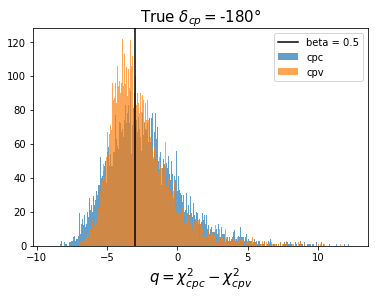

median = -2.9892597950159745
pvalue = 0.4464732366183092
chi_square = 0.018110919317917074
1/1 [==============================] - 0s 34ms/step


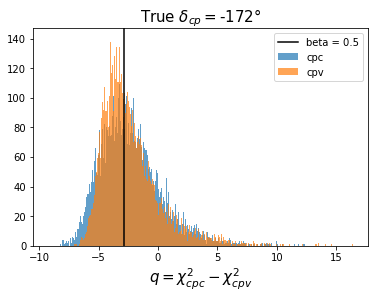

median = -2.8761938127083955
pvalue = 0.4584729236461823
chi_square = 0.010874660528480821
1/1 [==============================] - 0s 31ms/step


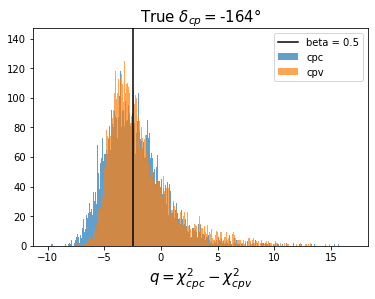

median = -2.4689905886187242
pvalue = 0.4737236861843092
chi_square = 0.004344476912310683
1/1 [==============================] - 0s 42ms/step


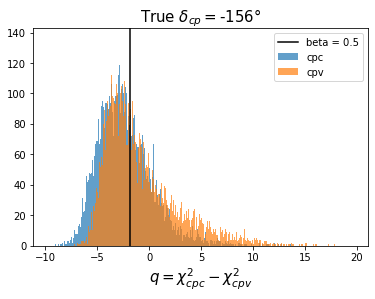

median = -1.8517241948790302
pvalue = 0.37405
chi_square = 0.10313454315505098
1/1 [==============================] - 0s 36ms/step


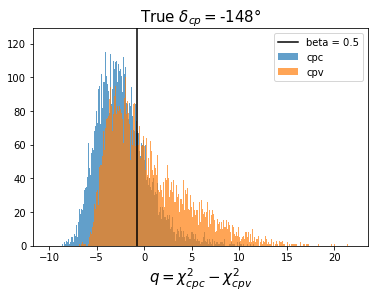

median = -0.7613568690164438
pvalue = 0.2404
chi_square = 0.4970481927069976
1/1 [==============================] - 0s 33ms/step


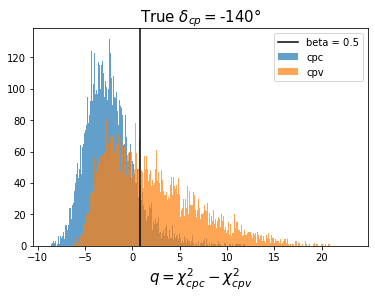

median = 0.8042752552980303
pvalue = 0.1094
chi_square = 1.5122242436627837
1/1 [==============================] - 0s 33ms/step


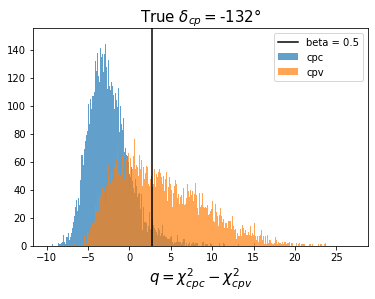

median = 2.78344049607046
pvalue = 0.04425
chi_square = 2.9014483771180255
1/1 [==============================] - 0s 33ms/step


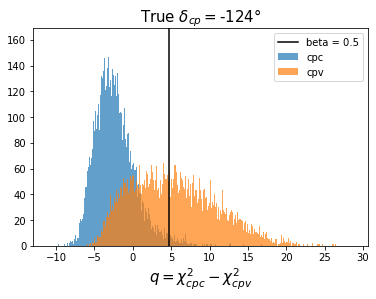

median = 4.780572607111072
pvalue = 0.01965
chi_square = 4.247852356657143
1/1 [==============================] - 0s 32ms/step


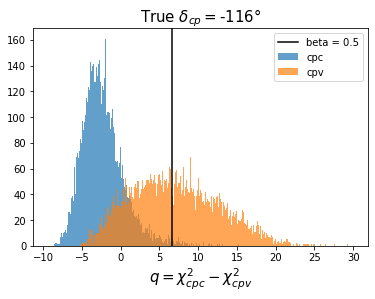

median = 6.615129754331614
pvalue = 0.00885
chi_square = 5.625600578580029
1/1 [==============================] - 0s 34ms/step


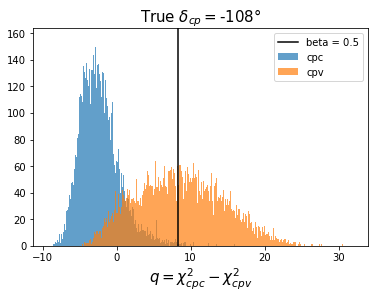

median = 8.34190414181399
pvalue = 0.00395
chi_square = 7.056004465031765
1/1 [==============================] - 0s 32ms/step


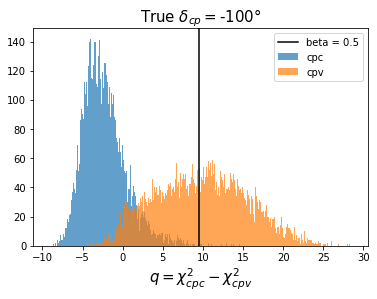

median = 9.517903072313466
pvalue = 0.0022
chi_square = 8.110894886879006
1/1 [==============================] - 0s 33ms/step


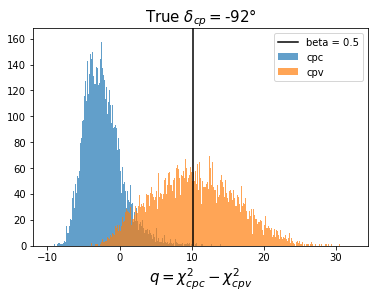

median = 10.206931234531567
pvalue = 0.00225
chi_square = 8.070165763425369
1/1 [==============================] - 0s 34ms/step


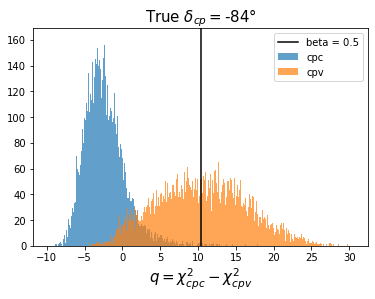

median = 10.37912572501483
pvalue = 0.0019
chi_square = 8.376995951509915
1/1 [==============================] - 0s 30ms/step


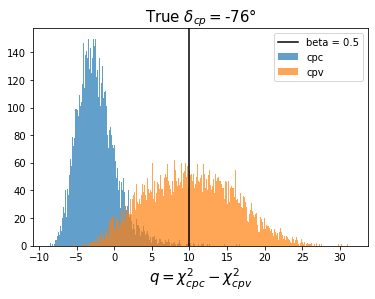

median = 9.897241482388242
pvalue = 0.00195
chi_square = 8.329797728972164
1/1 [==============================] - 0s 33ms/step


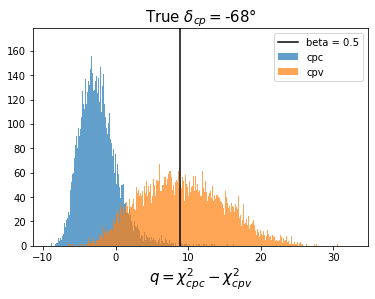

median = 8.941349364326076
pvalue = 0.0031
chi_square = 7.491235599485063
1/1 [==============================] - 0s 32ms/step


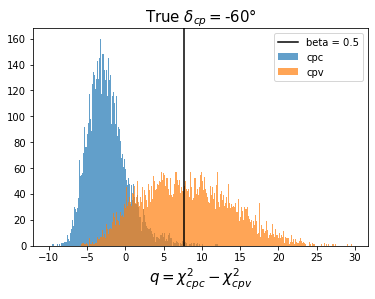

median = 7.636872663775597
pvalue = 0.0048
chi_square = 6.707652883844784
1/1 [==============================] - 0s 34ms/step


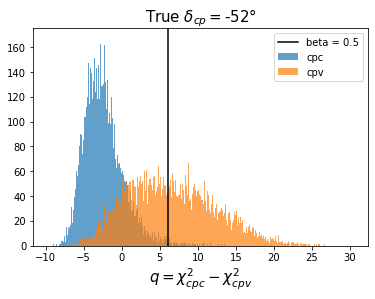

median = 6.0367748539724
pvalue = 0.0112
chi_square = 5.2144446606629495
1/1 [==============================] - 0s 35ms/step


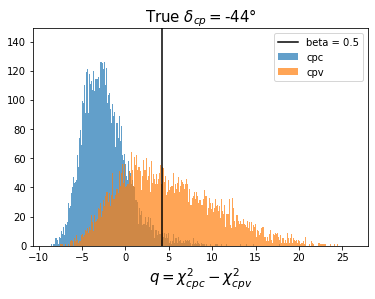

median = 4.169727503399782
pvalue = 0.02575
chi_square = 3.79193759372793
1/1 [==============================] - 0s 33ms/step


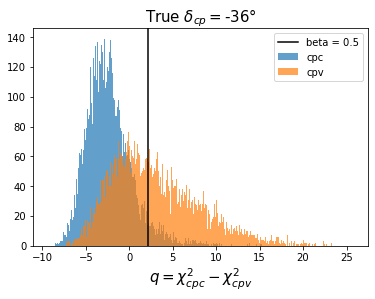

median = 2.1707653844094317
pvalue = 0.05785
chi_square = 2.474584699411867
1/1 [==============================] - 0s 33ms/step


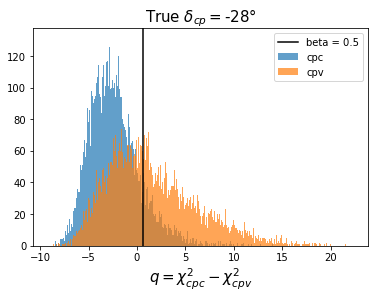

median = 0.5876121893206037
pvalue = 0.1249
chi_square = 1.3244218842078441
1/1 [==============================] - 0s 32ms/step


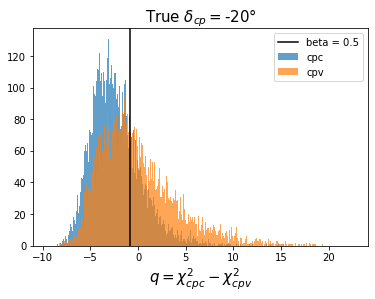

median = -0.86170792233934
pvalue = 0.2446
chi_square = 0.47828537381317715
1/1 [==============================] - 0s 31ms/step


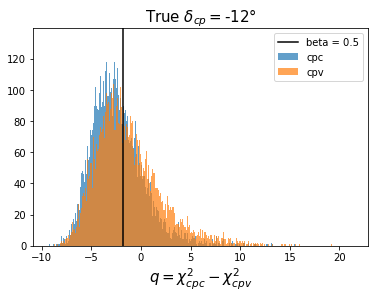

median = -1.8480129603226443
pvalue = 0.36875
chi_square = 0.11233613045440966
1/1 [==============================] - 0s 32ms/step


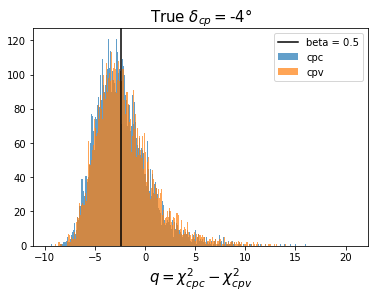

median = -2.4328500749317348
pvalue = 0.46985
chi_square = 0.005722457763997534


In [97]:
N_sample = 20000
chi_square_list = []
median = []

select_angle = np.arange(-180,1,8)
for angle in select_angle:
    deltacp_label = np.where(data2['delta']== angle)[0][0]
    prediction_cpv_T2 = model_T2_poisson.predict(input_poisson_generator_T2, verbose=1,steps = 1)

    #Poisson Under CPC Hypothesis
    deltacp_label = np.where(data2['delta']== 0)[0][0]
        
    prediction_cpc_T2 = model_T2_poisson.predict(input_poisson_generator_T2, verbose=1,steps = 1)
    
    P_cpc_T2_cpv = np.transpose(prediction_cpv_T2)[0]
    P_cpv_T2_cpv = np.transpose(prediction_cpv_T2)[1]
    delta_chi2_T2_cpv = -2*np.log(P_cpc_T2_cpv/P_cpv_T2_cpv)

    P_cpc_T2_cpc = np.transpose(prediction_cpc_T2)[0]
    P_cpv_T2_cpc = np.transpose(prediction_cpc_T2)[1]
    delta_chi2_T2_cpc = -2*np.log(P_cpc_T2_cpc/P_cpv_T2_cpc)

    a = delta_chi2_T2_cpc
    b = delta_chi2_T2_cpv

    bins = np.linspace(min(a), max(b), 1000)
    numa = len(a)
    numb = len(b)
    abin = plt.hist(a, bins=bins, alpha=0.7, label='cpc')
    bbin = plt.hist(b, bins=bins, alpha=0.7, label='cpv')
    cut = 0.50

    suma = 0
    for i, aval in enumerate(abin[0]):
        suma += aval
        if suma/numa >= 1-cut:
            acut = i
            break
    # plt.axvline(abin[1][acut], c='k')

    sumb = 0
    for i, bval in enumerate(bbin[0]):
        sumb += bval
        if sumb/numb >= cut:
            bcut = i
            break
    
    plt.axvline(bbin[1][bcut], c='k', label = 'beta = 0.5')
    median.append(bbin[1][bcut])
    plt.xlabel(r'$q = \chi^2_{cpc} - \chi^2_{cpv}$', fontsize=15)
    plt.legend()
    plt.title('True 'r'$\delta_{cp} = $'+str(angle)+'°', fontsize=15)
    # plt.xlim(0,300)
    plt.show()
    pvalue = sum(abin[0][bcut:])/sum(abin[0])
    if(pvalue>0.5):
        pvalue = 1-pvalue
    print('median =', bbin[1][bcut])
    print('pvalue =', pvalue)
#     chi = scipy.special.erfinv((1-2*pvalue))*np.sqrt(2)
#     print('chi =', chi)
    chi_square = chi2.ppf(1- 2 * pvalue,1)
#     chi_square = chi**2
    print('chi_square =', chi_square)
    chi_square_list.append(chi_square)


Text(0.5, 1.0, 'T2HK')

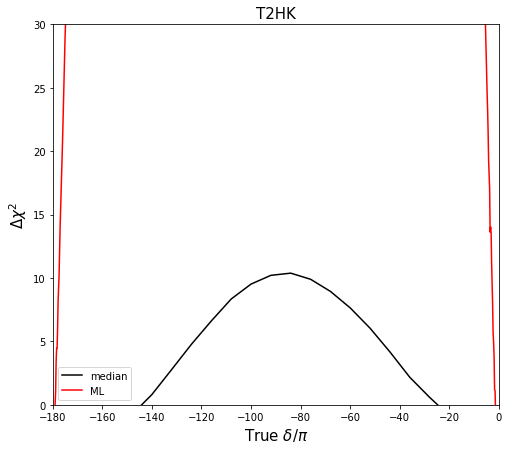

In [136]:
plt.figure(figsize = (8,7))
plt.plot([i for i in select_angle], median, c='k', label='median')
plt.ylim(0,30)
plt.xlim(-180,0)
x = data2['delta']
plt.plot(x, delta_chi2_T2,'r', label='ML')
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
plt.legend()
plt.title('T2HK', fontsize=15)

Text(0.5, 1.0, 'Poisson Model T2HK')

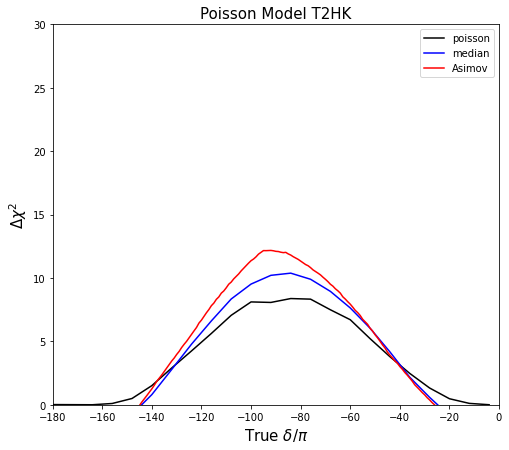

In [147]:
plt.figure(figsize = (8,7))
plt.plot([i for i in select_angle], chi_square_list, c='k', label='poisson')
plt.plot([i for i in select_angle], median, c='b', label='median')
plt.ylim(0,30)
plt.xlim(-180,0)
x = data2['delta']
# plt.plot(x, delta_chi2_T2,'r', label='ML')
plt.plot(x, delta_chi2_T2_poisson,'r', label='Asimov')
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
plt.legend()
plt.title('Poisson Model T2HK', fontsize=15)

In [ ]:
plt.figure(figsize = (8,7))
plt.plot([i for i in select_angle], chi_square_list, c='k', label='poisson')
plt.ylim(0,30)
plt.xlim(-180,0)
x = data2['delta']
plt.plot(x, delta_chi2_T2,'r', label='ML')
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
plt.legend()
plt.title('T2HK', fontsize=15)

Text(0.5, 1.0, 'T2HK')

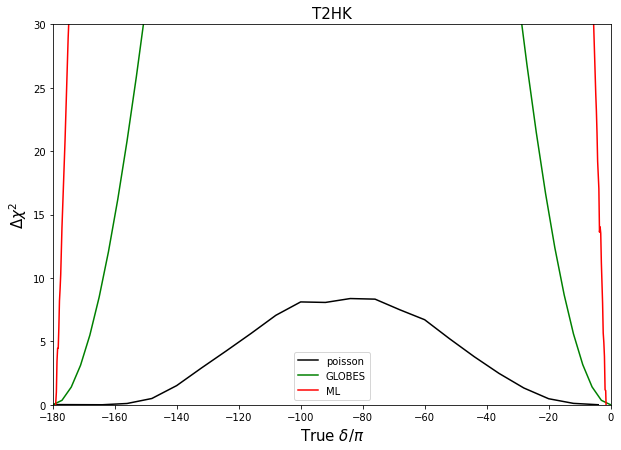

In [134]:
plt.figure(figsize = (10,7))
plt.plot([i for i in select_angle], chi_square_list, c='k', label='poisson')
plt.ylim(0,30)
plt.xlim(-180,0)
x = data2['delta']
plt.plot(delta_cp, OFF_T2,'g', label='GLOBES')
x = data2['delta']
plt.plot(x, delta_chi2_T2,'r', label='ML')
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2 $', fontsize=15)
plt.legend()
plt.title('T2HK', fontsize=15)

# Poisson Model , input : Asimov

### Prediction

In [138]:
prediction_T2_poisson = model_T2_poisson.predict(input_generator_T2, verbose=1,steps = 1)

1/1 [==============================] - 0s 17ms/step


# Calculate Chi Square

In [139]:
P_cpc_T2_poisson = np.transpose(prediction_T2_poisson)[0]
P_cpv_T2_poisson = np.transpose(prediction_T2_poisson)[1]

In [140]:
delta_chi2_T2_poisson = -2*np.log(P_cpc_T2_poisson/P_cpv_T2_poisson)

# Plot ML Results

Text(0.5, 1.0, 'Input Asimov Data to T2HK Models')

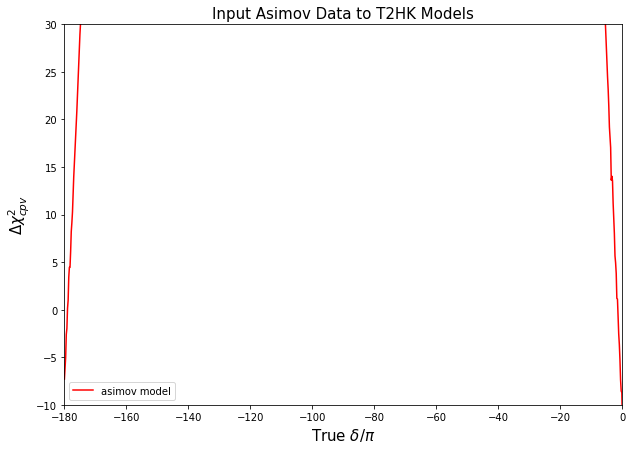

In [143]:
plt.figure(figsize = (10,7))
# plt.ylim(0, 200)
plt.xlabel(r'True $\delta / \pi $', fontsize=15)
plt.ylabel(r'$\Delta\chi^2_{cpv} $', fontsize=15)
x = data2['delta']
plt.plot(x, delta_chi2_T2_poisson,'b', label='poisson model')
plt.plot(x, delta_chi2_T2,'r', label='asimov model')
plt.plot(np.linspace(-180,180,100),np.full(100,25), label=r'$5 \sigma $')
plt.ylim(-10,30)
plt.xlim(-180,0)
plt.legend()
plt.title('Input Asimov Data to T2HK Models', fontsize=15)